**Table of contents**<a id='toc0_'></a>    
- [EDA, Visualization and Preprocessing](#toc1_)    
- [Team Members](#toc2_)    
- [IMPORTS](#toc3_)    
- [EDA](#toc4_)    
  - [Feature Meaning Explanation](#toc4_1_)    
    - [Features](#toc4_1_1_)    
- [Visualization](#toc5_)    
  - [Distribution](#toc5_1_)    
  - [Scatter Plots](#toc5_2_)    
  - [Correlation Matrix](#toc5_3_)    
  - [IQR](#toc5_4_)    
  - [Pie Chart Plots](#toc5_5_)    
    - [Gender Counts](#toc5_5_1_)    
    - [Chest Pain Types Counts](#toc5_5_2_)    
    - [Fasting BS Counts](#toc5_5_3_)    
    - [Resting ECG Counts](#toc5_5_4_)    
    - [ExerciseAngina Counts](#toc5_5_5_)    
    - [ST Slope Counts](#toc5_5_6_)    
    - [Heart Disease Counts](#toc5_5_7_)    
  - [Swarm Plots](#toc5_6_)    
- [Data Preprocessing](#toc6_)    
  - [Encoding](#toc6_1_)    
  - [Normalization](#toc6_2_)    
    - [MinMax Scaling](#toc6_2_1_)    
    - [Standard Scaler](#toc6_2_2_)    
  - [Train-Test Splitting](#toc6_3_)    
- [PCA](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[EDA, Visualization and Preprocessing](#toc0_)

# <a id='toc2_'></a>[Team Members](#toc0_)

| Name              | ID       |
|-------------------|----------|
| Seif Yasser       | 21P0102  |
| Mohammed Yasser   | 2100921  |
| Omar Ahmed        | 22P0109  |


# <a id='toc3_'></a>[IMPORTS](#toc0_)

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import joblib
from mpl_toolkits.mplot3d import Axes3D

In [115]:
data=pd.read_csv('../Dataset/dataset.csv')

# <a id='toc4_'></a>[EDA](#toc0_)

In [116]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## <a id='toc4_1_'></a>[Feature Meaning Explanation](#toc0_)

### <a id='toc4_1_1_'></a>[Features](#toc0_)
**Limits** are for normal person 

- **<span style="color:red;">Age:</span>**  
  The individual’s age in years. Age is a key factor in analyzing health risks.  

- **<span style="color:red;">Sex:</span>**  
  Represents the gender of the individual:  
  - `M`: Male  
  - `F`: Female  

- **<span style="color:red;">ChestPainType:</span>**  
  Describes the type of chest pain experienced:  
  - `ATA`: Atypical Angina – Not heart-related discomfort.  
  - `NAP`: Non-Anginal Pain – Pain unrelated to cardiac issues.  
  - `ASY`: Asymptomatic – No noticeable chest pain.  

- **<span style="color:red;">RestingBP:</span>**  
  Blood pressure (in mm Hg) when at rest. Higher values suggest cardiovascular strain.  
  - **Limits:** Typically ranges from 80 to 200 mm Hg.  

- **<span style="color:red;">Cholesterol:</span>**  
  The amount of cholesterol in the blood (mg/dL). High levels can lead to heart risks.  
  - **Limits:** Typically ranges from 100 to 564 mg/dL.  

- **<span style="color:red;">FastingBS:</span>**  
  Indicates fasting blood sugar levels:  
  - `1`: Greater than 120 mg/dL (high fasting sugar).  
  - `0`: Less than or equal to 120 mg/dL (normal fasting sugar).  

- **<span style="color:red;">RestingECG:</span>**  
  Results from a resting electrocardiogram (ECG), showing heart's electrical activity:  
  - `Normal`: No abnormalities detected.  
  - `ST`: Abnormal ST-T wave patterns, possibly indicating heart issues.  
  - `Others`: Other findings outside normal or ST-T wave results.  

- **<span style="color:red;">MaxHR:</span>**  
  Maximum heart rate achieved during exercise. Lower rates can point to heart problems.  
  - **Limits:** Typically ranges from 60 to 202 bpm (beats per minute).  

- **<span style="color:red;">ExerciseAngina:</span>**  
  Whether exercise induces angina (chest pain):  
  - `Y`: Yes  
  - `N`: No  

- **<span style="color:red;">Oldpeak:</span>**  
  ST depression on an ECG during exercise relative to rest. Indicates heart’s response to stress.  
  - **Limits:** Typically ranges from 0.0 to 6.2.  

- **<span style="color:red;">HeartDisease:</span>**  
  Target variable indicating whether the individual has heart disease:  
  - `1`: Presence of heart disease.  
  - `0`: Absence of heart disease.  


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


> No Nulls

In [118]:
data.select_dtypes(include=['int','float']).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [119]:
for i in data.columns:
    print("Number of Unique Values in ",i,':',data[i].nunique())
    print("Unique Values in ",i,':',data[i].unique()) if data[i].nunique()<10 else print()
    # print()

Number of Unique Values in  Age : 50

Number of Unique Values in  Sex : 2
Unique Values in  Sex : ['M' 'F']
Number of Unique Values in  ChestPainType : 4
Unique Values in  ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
Number of Unique Values in  RestingBP : 67

Number of Unique Values in  Cholesterol : 222

Number of Unique Values in  FastingBS : 2
Unique Values in  FastingBS : [0 1]
Number of Unique Values in  RestingECG : 3
Unique Values in  RestingECG : ['Normal' 'ST' 'LVH']
Number of Unique Values in  MaxHR : 119

Number of Unique Values in  ExerciseAngina : 2
Unique Values in  ExerciseAngina : ['N' 'Y']
Number of Unique Values in  Oldpeak : 53

Number of Unique Values in  ST_Slope : 3
Unique Values in  ST_Slope : ['Up' 'Flat' 'Down']
Number of Unique Values in  HeartDisease : 2
Unique Values in  HeartDisease : [0 1]


> 💡**Note:** No Duplicates Rows in the dataset 

In [120]:
data.duplicated().sum()

0

> 💡**Note:** No Null values in the dataset 

In [121]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [122]:
data[data['ChestPainType']=='TA']['HeartDisease'].value_counts()

HeartDisease
0    26
1    20
Name: count, dtype: int64

In [123]:
(data['FastingBS'].value_counts()[0]/data['FastingBS'].value_counts().sum())*100

76.68845315904139

In [124]:
# data['FastingBS'].value_counts()
data[['FastingBS','HeartDisease']].value_counts()

FastingBS  HeartDisease
0          0               366
           1               338
1          1               170
           0                44
Name: count, dtype: int64

> 💡**Note:** nearly 77% of the FastinBS values are 0, it could be removed if necessary 

In [125]:
data[['RestingECG','HeartDisease']].value_counts()

RestingECG  HeartDisease
Normal      1               285
            0               267
ST          1               117
LVH         1               106
            0                82
ST          0                61
Name: count, dtype: int64

In [126]:
data['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [127]:
data[data['Oldpeak']<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,0,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,0,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1


> 💡**Note:** No negative values in Oldpeak it will be converted to Positive

In [128]:
data['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

# <a id='toc5_'></a>[Visualization](#toc0_)

In [129]:
# with plt.rc_context(rc={'figure.dpi': 500, 'axes.labelsize': 9, 'xtick.labelsize': 7.5, 'ytick.labelsize': 7.5}):
#     fig_2, ax_2 = plt.subplots(6, 3, figsize=(11, 17))
    
#     for col_no, column in enumerate(data.select_dtypes(include=['int', 'float']).columns):
#         sns.kdeplot(ax=ax_2[col_no, 0], x=data[column], hue=data['HeartDisease'], common_norm=True, fill=True, alpha=0.4, palette=my_palette, linewidth=1.5)
#         ax_2[col_no, 0].get_legend().remove()
        
#         cuts = pd.qcut(data[column], 4, precision=0, duplicates='drop')
#         sns.countplot(ax=ax_2[col_no, 1], x=cuts, hue=data['HeartDisease'], linewidth=1.5, edgecolor='k', palette=my_palette, alpha=0.8)
#         ax_2[col_no, 1].get_legend().remove()
#         plt.setp(ax_2[col_no, 1].get_xticklabels(), rotation=45)
        
#         sns.violinplot(ax=ax_2[col_no, 2], x=data['HeartDisease'], y=data[column], palette=my_palette, scale='width', linewidth=0.5, inner=None)
#         plt.setp(ax_2[col_no, 2].collections, alpha=0.35)
#         sns.stripplot(ax=ax_2[col_no, 2], x=data['HeartDisease'], y=data[column], palette=my_palette, alpha=1, s=1.8, jitter=0.1)
    
#     handles, labels = ax_2[4, 1].get_legend_handles_labels()
#     fig_2.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.027), ncol=2, fontsize=9.5, title='HeartDisease', title_fontsize=10)
    
#     plt.tight_layout(pad=1.5)
#     plt.show()


## <a id='toc5_1_'></a>[Distribution](#toc0_)
> - Histograms (kde=True)

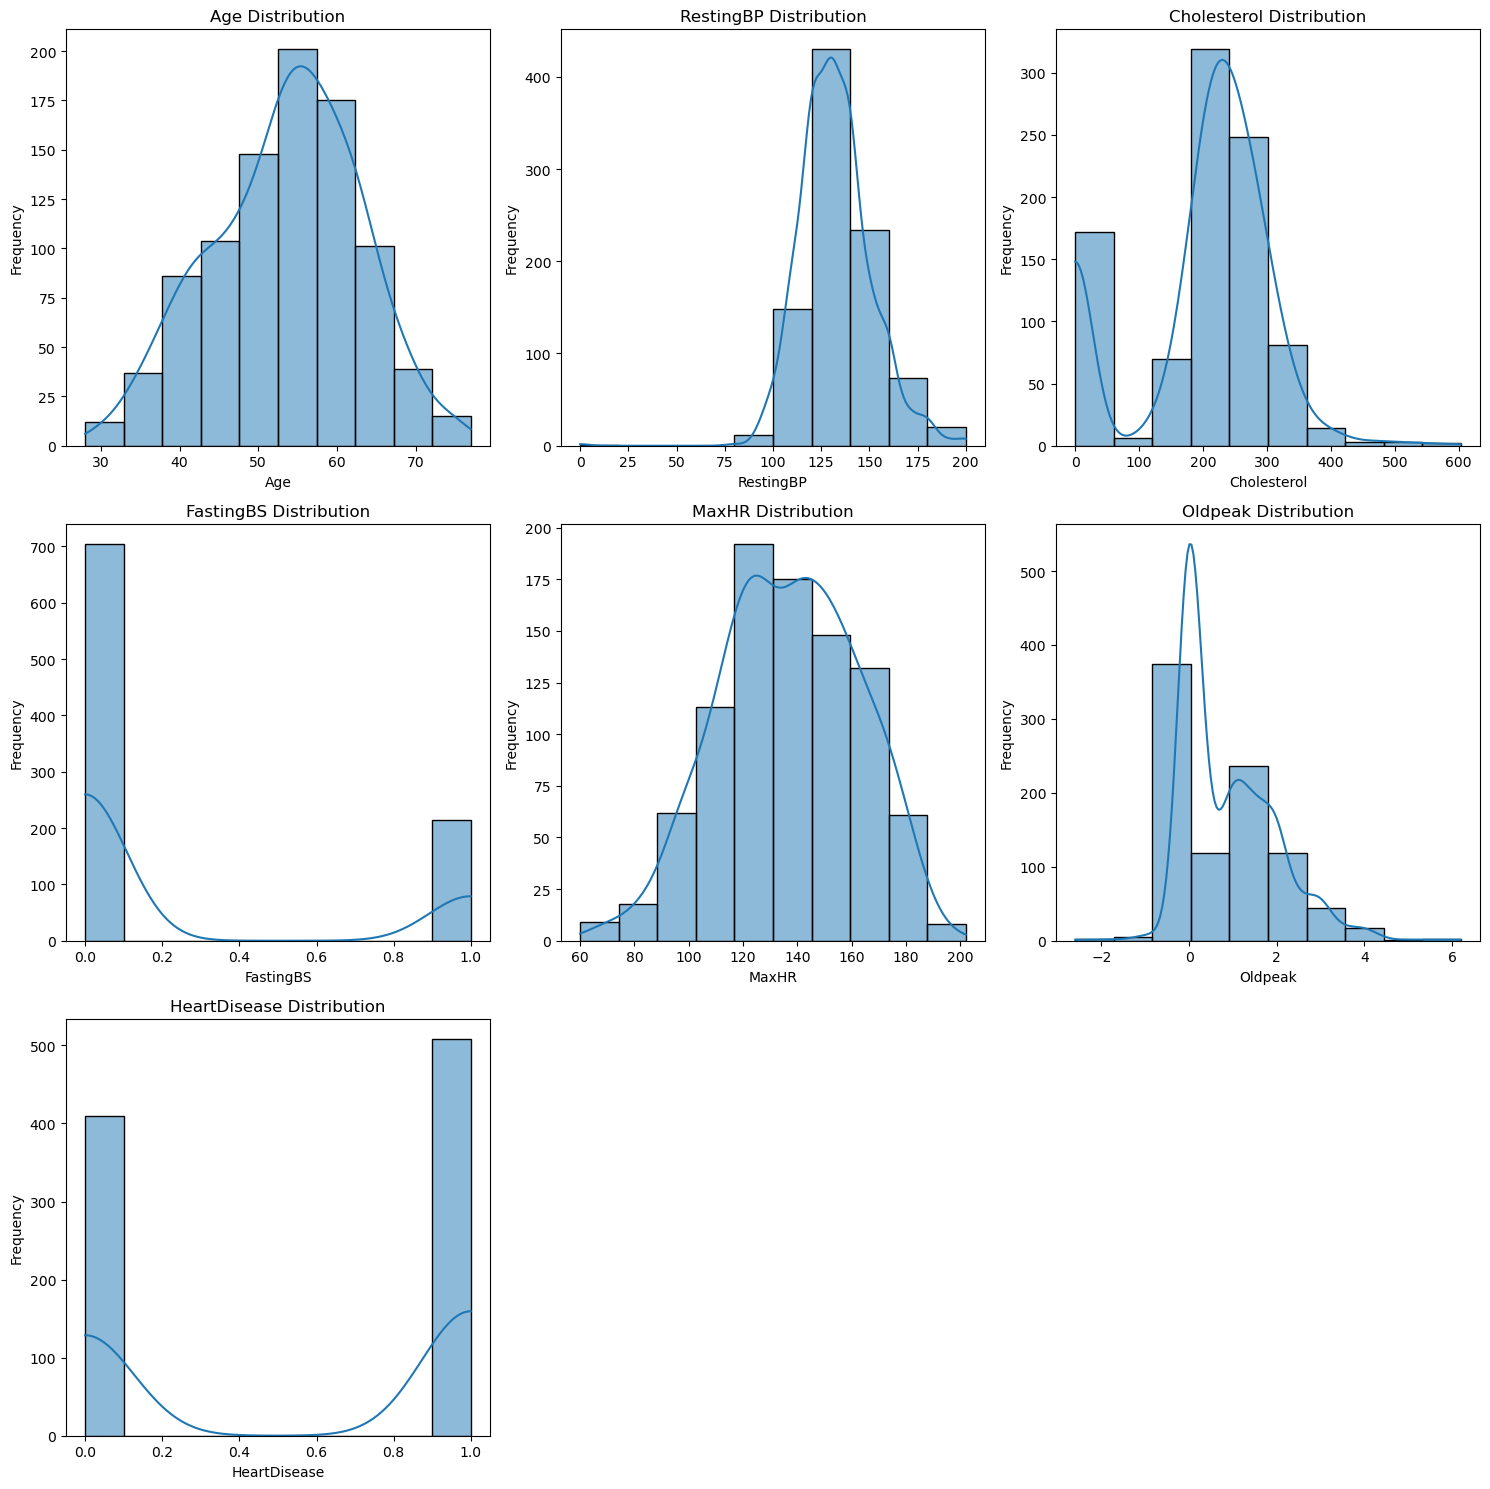

In [130]:
numeric_features = data.select_dtypes(include=['int', 'float']).columns

fig, axes = plt.subplots(nrows=(len(numeric_features) + 2) // 3, ncols=3, figsize=(15, 5 * ((len(numeric_features) + 2) // 3)))
axes = axes.flatten()
for ax, feature in zip(axes, numeric_features):
    sns.histplot(data[feature], bins=10, kde=True, ax=ax)
    ax.set_title(f'{feature} Distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
# Hide any unused subplots
for i in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

## <a id='toc5_2_'></a>[Scatter Plots](#toc0_)

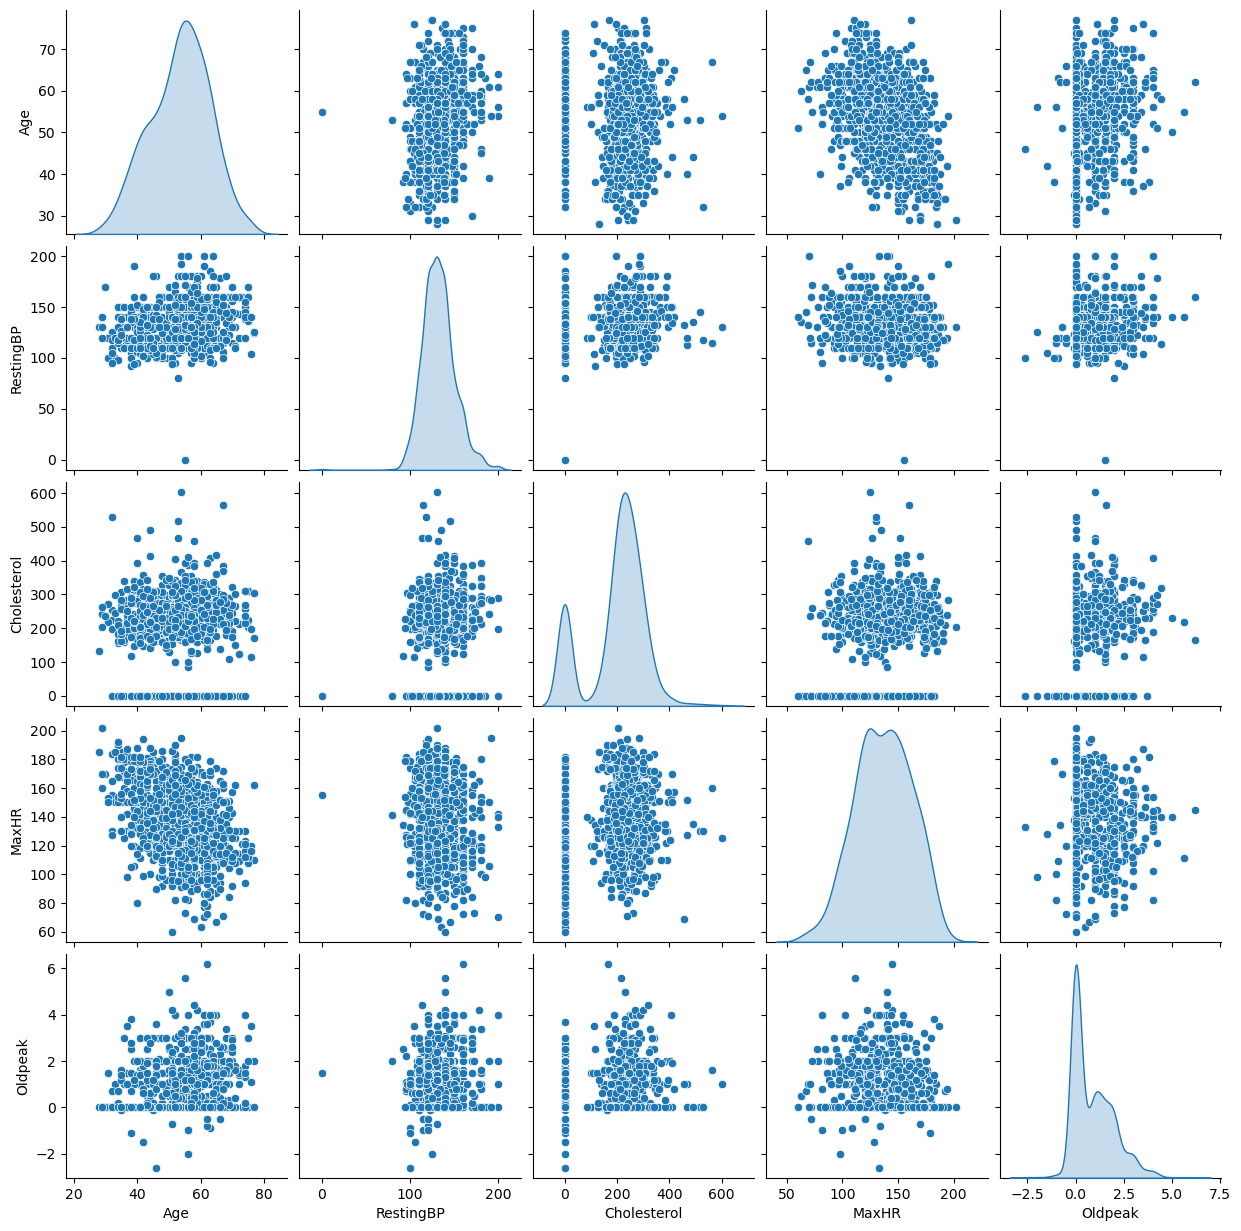

In [131]:
sns.pairplot(data[numeric_features].drop(columns=['FastingBS','HeartDisease']), diag_kind='kde')  
plt.show()

## <a id='toc5_3_'></a>[Correlation Matrix](#toc0_)

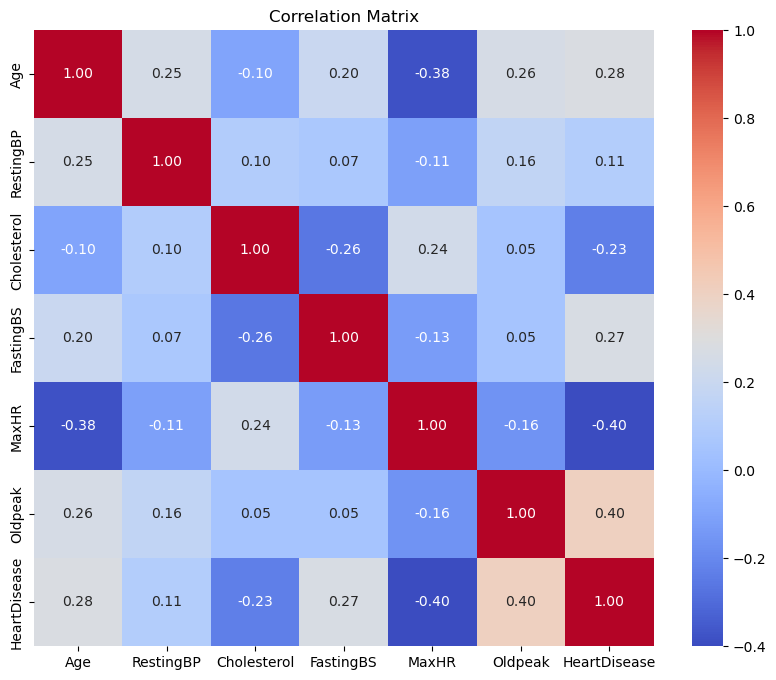

In [132]:
corr_matrix = data.select_dtypes(['int','float']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=False)
plt.title('Correlation Matrix')
plt.show()

## <a id='toc5_4_'></a>[IQR](#toc0_)

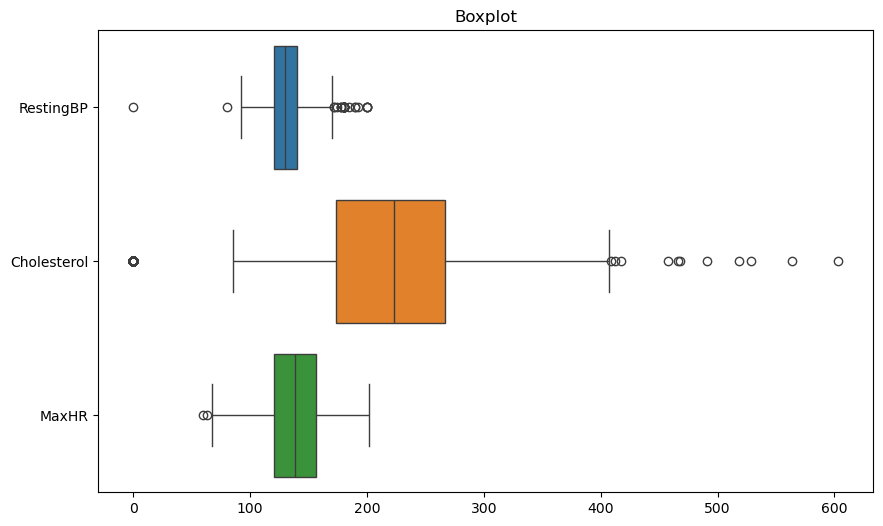

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(columns=['Age','Oldpeak','HeartDisease','FastingBS']), orient='h')
plt.title('Boxplot')
plt.show()

In [134]:
data[data['RestingBP']>180]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


## <a id='toc5_5_'></a>[Pie Chart Plots](#toc0_)

In [135]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [136]:
def pie_chart(data, column):
    grouped_data=data.groupby(column)
    counts = grouped_data['Age'].count()
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.legend(title='Count', labels=[f'{gender}: {count}' for gender, count in counts.items()])
    plt.title('Count of '+' and '.join(data[column].unique().astype(str)))
    plt.show()

In [137]:
def compact_pie_chart(data, column,ax):
    grouped_data = data.groupby(column)
    counts = grouped_data['Age'].count()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    ax.legend(title=f'Count of {column}', labels=[f'{label}: {count}' for label, count in counts.items()], title_fontsize='7', fontsize='5', loc='best')
    ax.set_title('Count of ' + ' and '.join(data[column].unique().astype(str)))

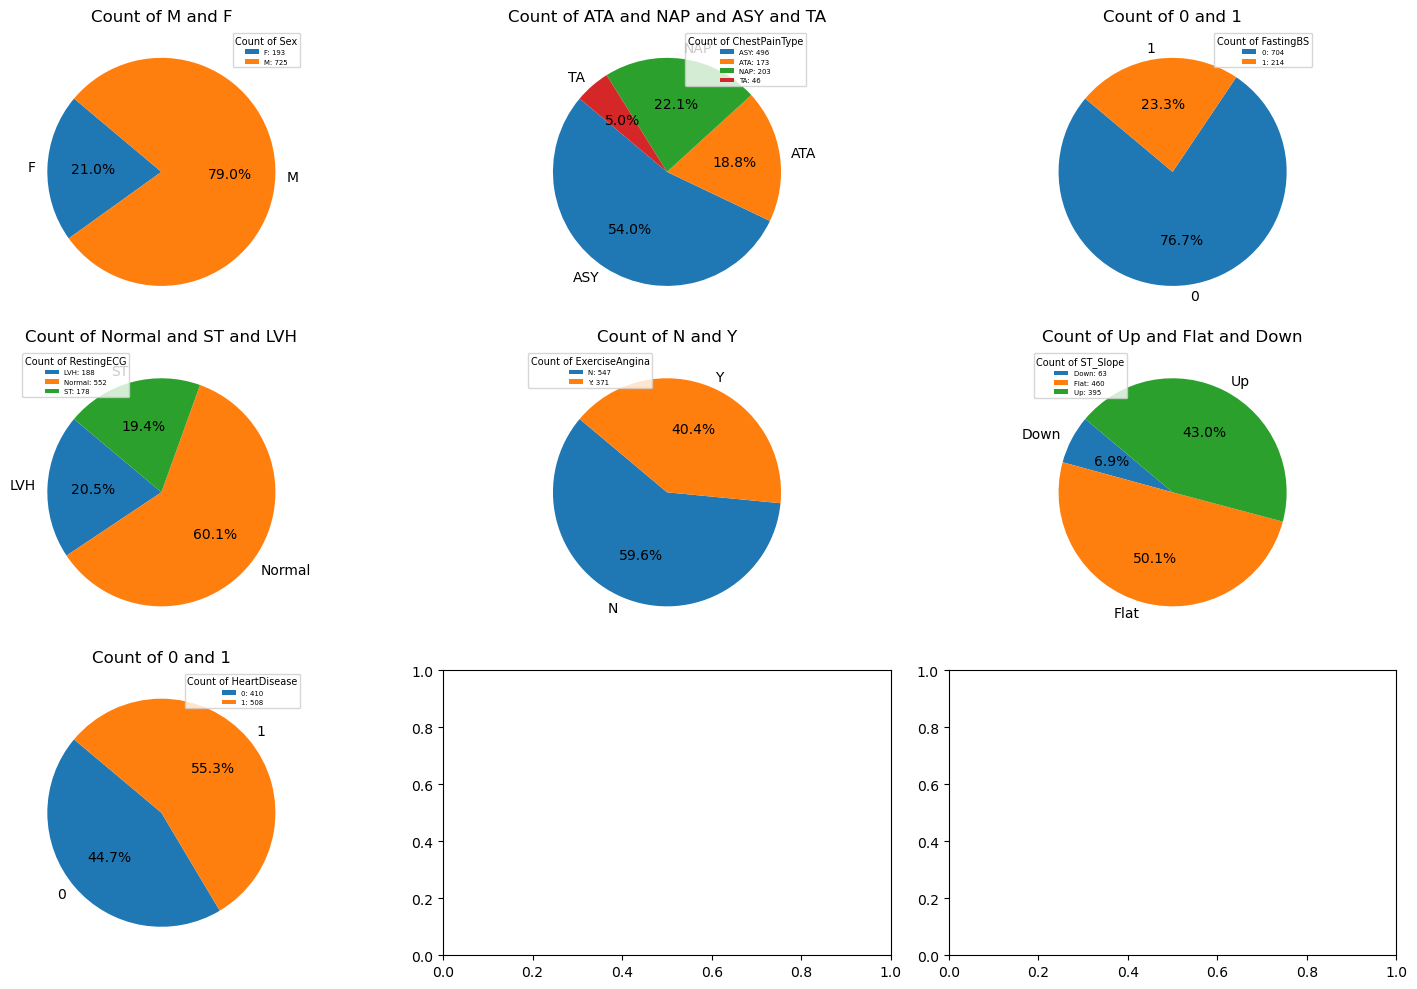

In [138]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

for ax, column in zip(axes, columns):
    compact_pie_chart(data, column, ax)

plt.tight_layout()
plt.show()

### <a id='toc5_5_1_'></a>[Gender Counts](#toc0_)

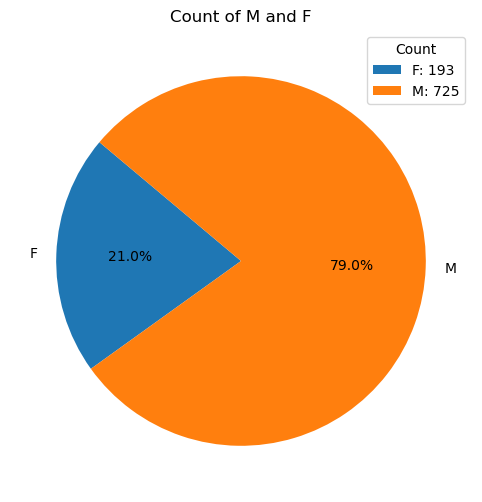

In [139]:
pie_chart(data,'Sex')

### <a id='toc5_5_2_'></a>[Chest Pain Types Counts](#toc0_)

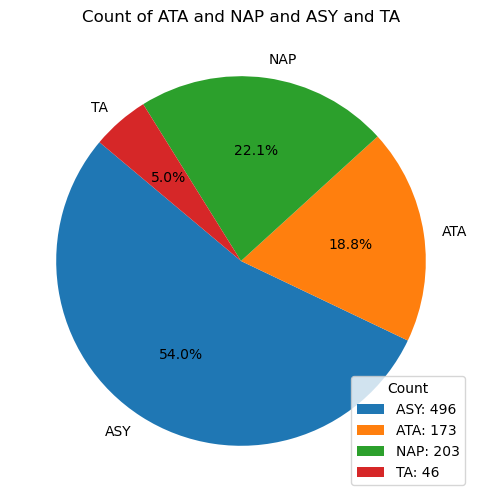

In [140]:
pie_chart(data,'ChestPainType')

### <a id='toc5_5_3_'></a>[Fasting BS Counts](#toc0_)

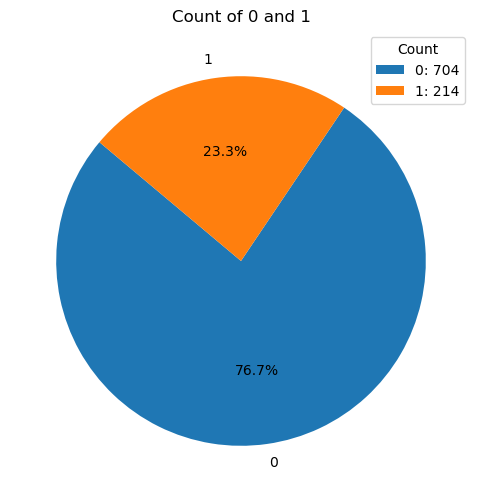

In [141]:
pie_chart(data,'FastingBS')

### <a id='toc5_5_4_'></a>[Resting ECG Counts](#toc0_)

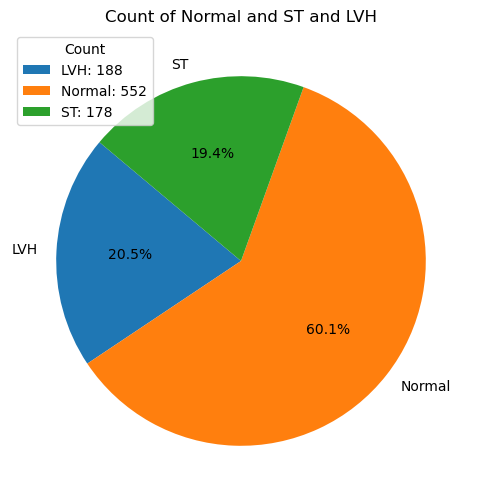

In [142]:
pie_chart(data,'RestingECG')

### <a id='toc5_5_5_'></a>[ExerciseAngina Counts](#toc0_)

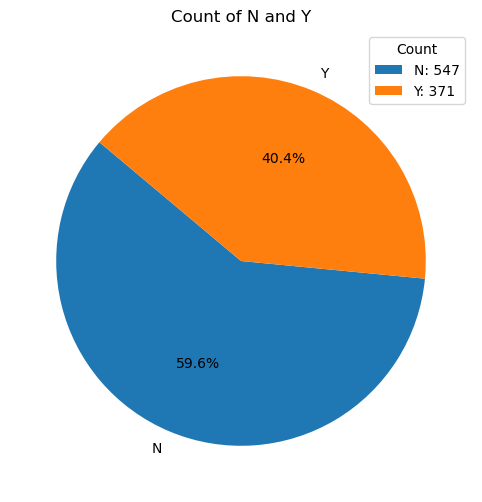

In [143]:
pie_chart(data,'ExerciseAngina')

### <a id='toc5_5_6_'></a>[ST Slope Counts](#toc0_)

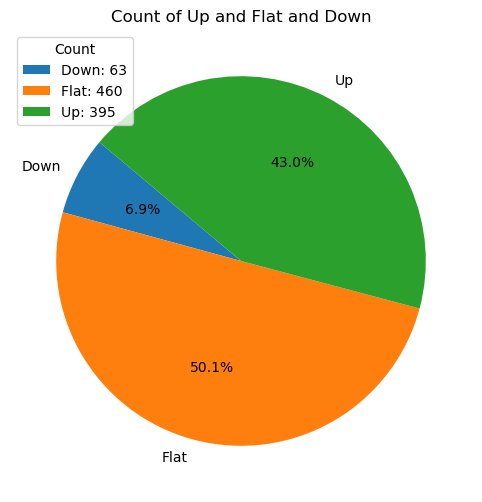

In [144]:
pie_chart(data,'ST_Slope')

### <a id='toc5_5_7_'></a>[Heart Disease Counts](#toc0_)

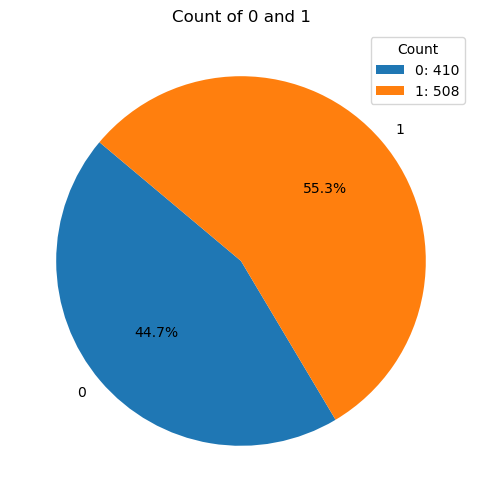

In [145]:
pie_chart(data,'HeartDisease')

## <a id='toc5_6_'></a>[Swarm Plots](#toc0_)

C:\Users\omarbayom\AppData\Local\Temp\ipykernel_14752\3885371014.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols , y = 'Sex' , data = data , palette = 'vlag')
c:\Users\omarbayom\miniconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\omarbayom\miniconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\omarbayom\AppData\Local\Temp\ipykernel_14752\3885371014.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable 

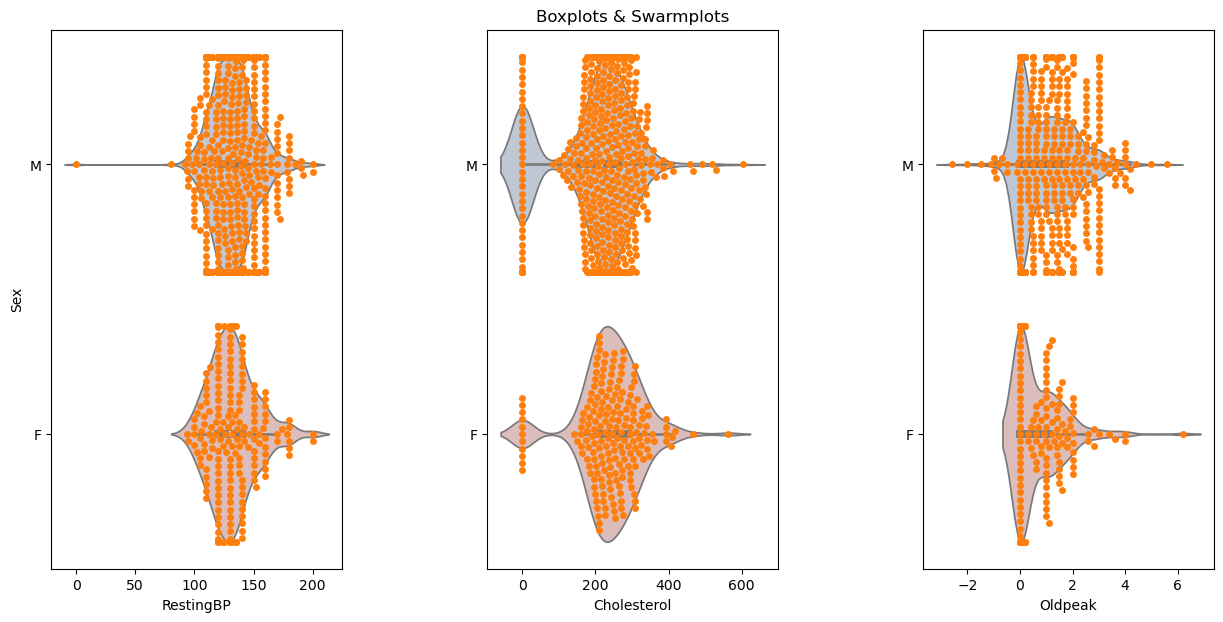

In [146]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['RestingBP' , 'Cholesterol' , 'Oldpeak']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Sex' , data = data , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Sex' , data = data)
    plt.ylabel('Sex' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

# <a id='toc6_'></a>[Data Preprocessing](#toc0_)

> <br>
> 
> **💡Note:** *Cholesterol* of a person can never be 0. These 0s will be replaced with median values of the corresponding columns, that's because medians aren't affected by outliers. <br>
> <br>
> 
> **💡Note:** *Resting Blood Pressure* of a person can never be 0. these 0s will be replaced with median values of the corresponding columns, that's because medians aren't affected by outliers <br>
> <br>

> **💡Note:** TA could be converted to ATA, it could be a Typo error. "Overthinking" 

In [147]:
data[data['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [148]:
data['Cholesterol'].median()

223.0

## <a id='toc6_1_'></a>[Encoding](#toc0_)

In [149]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [150]:
encoder=LabelEncoder()

In [151]:
columns_to_encode=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [152]:
df=data.copy()

In [153]:
for i in columns_to_encode:
    df[i]=encoder.fit_transform(data[i])

In [154]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


## <a id='toc6_2_'></a>[Normalization](#toc0_)

### <a id='toc6_2_1_'></a>[MinMax Scaling](#toc0_)

In [155]:
MM_scaler=MinMaxScaler()

In [156]:
df_MM_scaled=MM_scaler.fit_transform(df.drop(columns=['HeartDisease']))

### <a id='toc6_2_2_'></a>[Standard Scaler](#toc0_)

In [157]:
STD_scaler = StandardScaler()

In [158]:
df_STD_scaled = STD_scaler.fit_transform(df.drop(columns=['HeartDisease']))

## <a id='toc7_'></a>[PCA](#toc0_)

In [159]:


def plot_2d_3d(df):
    """
    Displays either a 2D or 3D scatter plot of features in a DataFrame.
    Prioritizes 3D plotting if sufficient numerical columns exist.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
    """
    # Ensure DataFrame has numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    if len(numeric_columns) >= 3:
        # 3D Plot
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(
            df[numeric_columns[0]],
            df[numeric_columns[1]],
            df[numeric_columns[2]],
            c='red',
            alpha=0.6
        )
        ax.set_title(f"3D Scatter Plot ({numeric_columns[0]}, {numeric_columns[1]}, {numeric_columns[2]})")
        ax.set_xlabel(numeric_columns[0])
        ax.set_ylabel(numeric_columns[1])
        ax.set_zlabel(numeric_columns[2])
        plt.show()
    elif len(numeric_columns) >= 2:
        # 2D Plot
        plt.figure(figsize=(8, 6))
        plt.scatter(df[numeric_columns[0]], df[numeric_columns[1]], c='blue', alpha=0.6)
        plt.title(f"2D Scatter Plot ({numeric_columns[0]} vs {numeric_columns[1]})")
        plt.xlabel(numeric_columns[0])
        plt.ylabel(numeric_columns[1])
        plt.grid(True)
        plt.show()
    else:
        print("The DataFrame must have at least 2 numerical columns for plotting.")


### <a id='toc7_'></a>[PCA before Preprocessing 1D with the label concatenated ](#toc0_) 

#### <a id='toc7_'></a>[Usnig MinMax Scaling ](#toc0_) 

In [160]:
pca_MMB_1D = PCA(n_components=1)
pca_result_MMB_1D = pca_MMB_1D.fit_transform(df_MM_scaled)

In [161]:
pca_MMB_1D.score(df_MM_scaled)

-1.6214151262124932

In [162]:
# pca.

In [163]:
pca_df_MMB_1D = pd.DataFrame(pca_result_MMB_1D, columns=['PCA_F1'])
pca_df_MMB_1D['HeartDisease'] = df['HeartDisease'].values

In [164]:
pca_df_MMB_1D

,PCA_F1,HeartDisease
0,-0.508560,0
1,-0.701778,1
2,-0.389375,0
3,0.314913,1
4,-0.505894,0
...,...,...
913,-0.468736,1
914,0.116104,1
915,0.651858,1
916,-0.674650,1


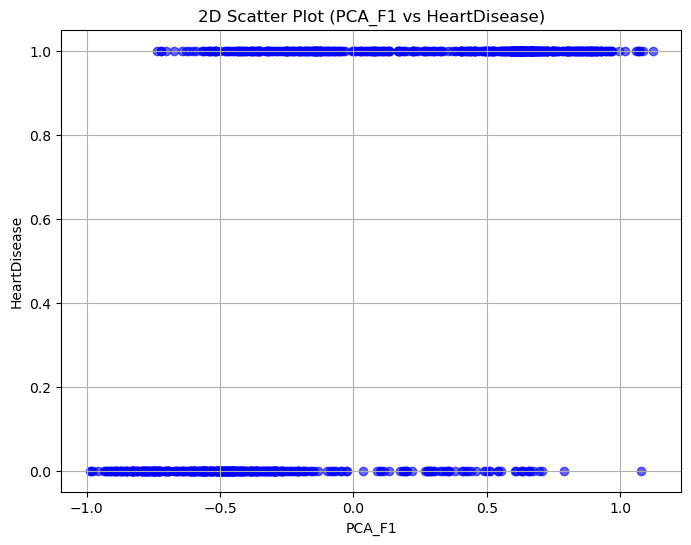

In [165]:
plot_2d_3d(pca_df_MMB_1D)

#### <a id='toc7_'></a>[Standard Scale](#toc0_) 

In [166]:
pca_STDB_1D = PCA(n_components=1)
pca_result_STDB_1D = pca_STDB_1D.fit_transform(df_STD_scaled)
pca_STDB_1D.score(df_MM_scaled)

-11.889757509549675

In [167]:
pca_df_STDB_1D = pd.DataFrame(pca_result_STDB_1D, columns=['PCA_F1'])
pca_df_STDB_1D['HeartDisease'] = df['HeartDisease'].values

In [168]:
pca_df_STDB_1D

,PCA_F1,HeartDisease
0,2.261181,0
1,1.137621,1
2,1.101846,0
3,-0.980703,1
4,1.046800,0
...,...,...
913,1.179165,1
914,-2.021615,1
915,-1.663972,1
916,1.701615,1


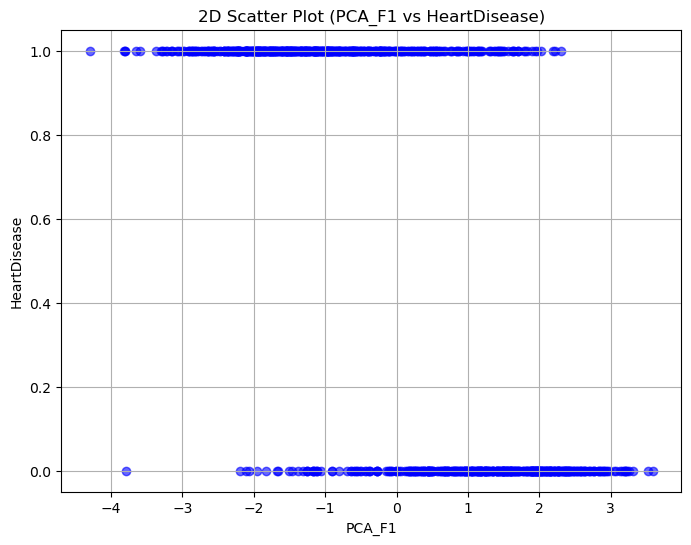

In [169]:
plot_2d_3d(pca_df_STDB_1D)

### <a id='toc7_'></a>[PCA before Preprocessing 2D with the label concatenated ](#toc0_) 

#### <a id='toc7_'></a>[Usnig MinMax Scaling ](#toc0_) 

In [170]:
pca_MMB_2D = PCA(n_components=2)
pca_result_MMB_2D = pca_MMB_2D.fit_transform(df_MM_scaled)

In [171]:
pca_MMB_2D.score(df_MM_scaled)

-1.169313778226141

In [172]:
# pca.

In [173]:
pca_df_MMB_2D = pd.DataFrame(pca_result_MMB_2D, columns=['PCA_F1','PCA_F2'])
pca_df_MMB_2D['HeartDisease'] = df['HeartDisease'].values

In [174]:
pca_df_MMB_2D

,PCA_F1,PCA_F2,HeartDisease
0,-0.508560,-0.017989,0
1,-0.701778,-0.250185,1
2,-0.389375,0.041581,0
3,0.314913,-0.679467,1
4,-0.505894,0.046648,0
...,...,...,...
913,-0.468736,0.042977,1
914,0.116104,0.860054,1
915,0.651858,-0.358345,1
916,-0.674650,-0.330580,1


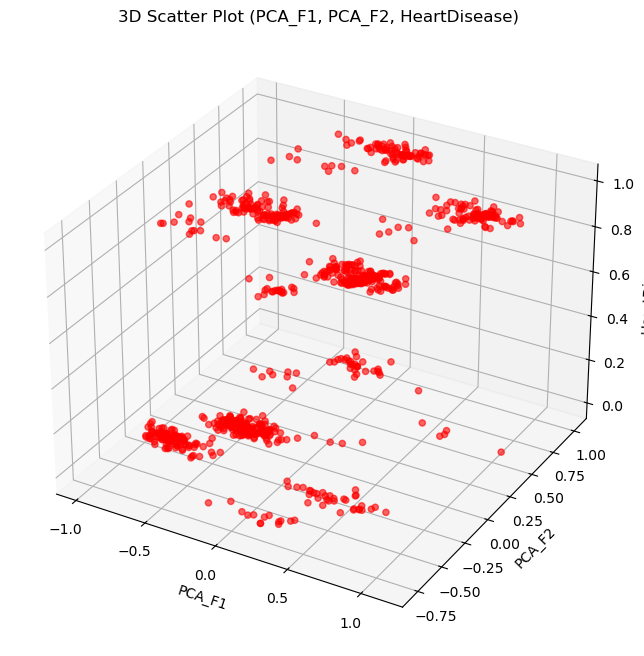

In [175]:
plot_2d_3d(pca_df_MMB_2D)

#### <a id='toc7_'></a>[Standard Scale](#toc0_) 

In [176]:
pca_STDB_2D = PCA(n_components=2)
pca_result_STDB_2D = pca_STDB_2D.fit_transform(df_STD_scaled)
pca_STDB_2D.score(df_MM_scaled)

-11.939395132288372

In [178]:
pca_df_STDB_2D = pd.DataFrame(pca_result_STDB_2D, columns=['PCA_F1','PCA_F2'])
pca_df_STDB_2D['HeartDisease'] = df['HeartDisease'].values

In [179]:
pca_df_STDB_2D

,PCA_F1,PCA_F2,HeartDisease
0,2.261181,0.169797,0
1,1.137621,1.097544,1
2,1.101846,-1.167057,0
3,-0.980703,1.113893,1
4,1.046800,-0.395467,0
...,...,...,...
913,1.179165,0.062925,1
914,-2.021615,0.329905,1
915,-1.663972,-0.093808,1
916,1.701615,1.426254,1


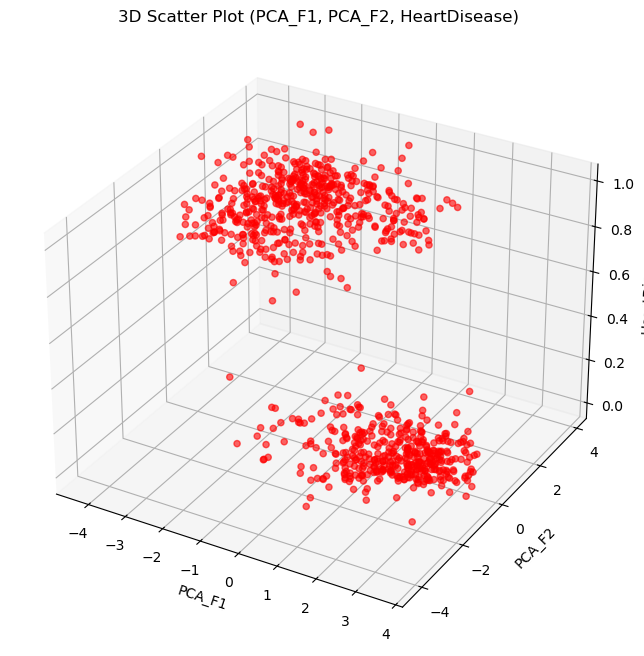

In [180]:
plot_2d_3d(pca_df_STDB_2D)